Execute this once to execute a css-hack for nicer "terminal code" display:

In [ ]:
%%html
<style>
.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon pre > code {
    background-color: white;
    color: black;
    font-weight: 600;
}
.jp-RenderedHTMLCommon pre {
    padding: 10px;
    border: solid black;
}
</style>

# Lesson 13: Version control with git

*Goal: Learn how to use git* 

Up until now we only worked with very small pieces of code that also did not depend on each other. But if we work on larger projects we might encounter a couple of very common issues. Imagine, for example, that we changed a part of our code a couple of weeks ago. But now we notice that we would like to change back to the previous version (maybe we want to have the old functionality or we introduced a bug without noticing) but can not really remember all the details of what we have changed since then. To avoid such cases we could have saved a copy of the code each time we made a change. We could then compare the different versions of our code to see what changed. Doing this manually would obviously become very cumbersome very fast. Fortunately there are already tools for **version control** that can do this and much more. 

For larger software projects it's also quite common to have multiple people working on different parts of the code at the same time. We, could for example work on the implementation of some class while another developer writes the code for some function. In such a scenario it would be great to:
- Have a mechanism to easily exchange developments to have everyone working on the same base version of the software.
- Keep a detailed account of what was changed and who changed it.
- Have a way to resolve conflicts that occur when two people change the same part of the code at the same time.

**Version control** tools can also help us with all of this.

The most popular version control tool is called **git** and nowadays there are virtually no software projects that do not manage their code with git. It is therefore a good idea to learn how to use it. Git can also be used for non-programming projects such as essays, lab reports or a bachelor thesis. (It works best with text based files such as source code, ".txt" files or latex documents). Being able to use git is therefore also useful even if you do not want to write software. 

In this lesson we will learn the basic and most common usage of git. While git is a very powerful tool, most day-to-day usage relies only on a couple of concepts and commands that we will introduce in the following. With this we will be able to use git for our own small projects. In addition we will also discuss some more advanced topics that could be useful if we want to work on larger projects.

We will first discuss some basic concepts and terms that we will encounter when working with git. While this first part is theoretical and rather dry, it will be useful when we come to the hands-on part and actually use git.

## It's your choice

Given that this topic is not so simple and sometimes pictures and text can be better combined in a video than in a written document, we provide a short introduction video in addition to the notebook.
There are two options for you:
1. You read this notebook as usual
2. You watch [this video](https://lernen.min.uni-hamburg.de/mod/resource/view.php?id=212276), which you find on moodle in the section of unit 13.
   Of course you can still use the notebook to look things up in the future.
   For now you are allowed to skip the "Basic concepts" and "Git workflow" sections and continue reading at "Recap: Terminals and shells"

## Basic concepts

### Repositories

In git a project is called a **repository**. A **repository** basically is a directory that contains all the files (code, documentation, ...) of our project. But in addition to all the project related files it also contains different versions of those files as well as a detailed history of all changes that were made to the project (There is a hidden directory that contains all the additional information). The git tool allows us to switch between the different versions and to check the history of the project. 

The main repository is usually created on a website for hosting git repositories. This online repository is called **remote repository**. To work on the project we usually download a copy of the entire repository (**clone** in git terms) to our own computers. This one is called the **local repository**. After we made some changes to our local repository we can **push** (upload) them to the remote repository. We can also **pull** (download) changes that were made in the remote repository while we were working in our local repository (perhaps other developers made those changes). When pulling or pushing, only the changes and history are transferred - we do not need to download or upload the entire project each time.

---- 
#### Advanced Topic: Forking Repositories

There is another, more advanced concept, but since it kind of fits here, we want to discuss it already here: **forking** of repositories. 

**Note**: During this discussion we will have to mention a couple of new terms that we will only explain later. For now just take not of them and don't worry. We will explain them later.

If we want to work on a project with other people we could invite those people as developers to our repository. But this is usually only a good idea if we actually know the people. (Later you will create your own repository on git hosting website. And there you can find the developer access options under *Main page -> Project information -> Members*)

Especially in large projects, in which people do not know each other personally, a better way is to use **forks** of the repository. And they are used very often in the "real world": A lot of widely used software is open-source and the code is hosted on github or another git host. Examples are the firefox browser, the chrome browser or linux. In principle we could also work on that code, for example if we spotted a bug and fix it or develop a cool new feature. To do so we could **fork** the **original repository** to create a **remote** copy of this repository under our ownership. The difference to a **clone** is that a **fork** is a **remote repository** that exists online on a git hosting site, while the **clone** is a **local repository** that exists on our computer (Note that we can **clone** a **fork**). We could then do whatever we want with it. And we can also propose to **merge** changes from our **fork** back into the **original repository** by opening a **merge request** . In such a case the **merge request** will be reviewed and approved by owners of the original repository. (It would obviously a bad idea if anyone could change the code of the firefox browser whenever they wanted.)  
Most git hosting sites have a button to fork repositories.

----


### Overview of Repositories and how they get synced

<div>
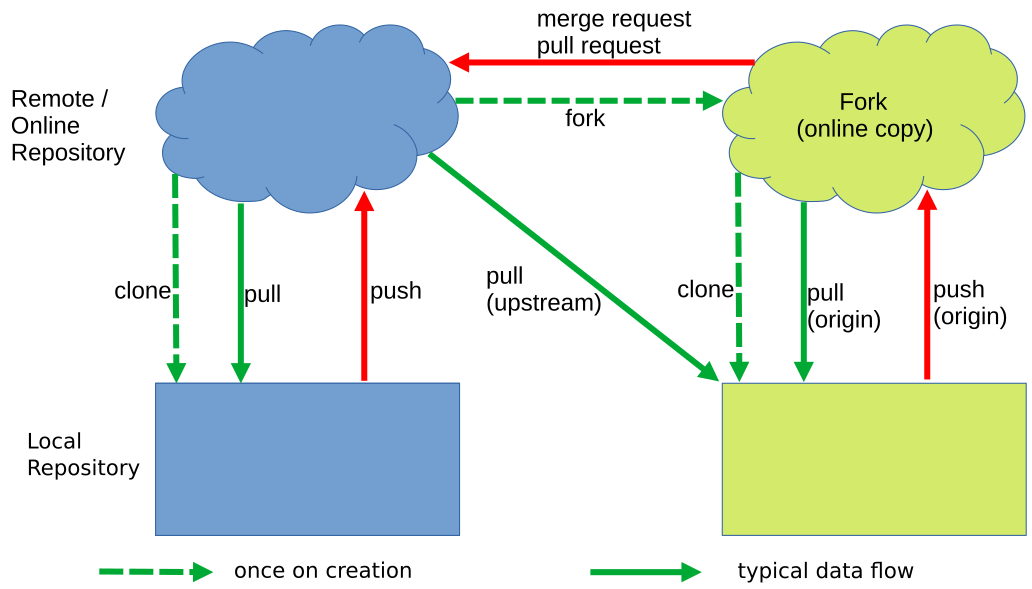
</div>


There are 4 types of repositories:
- original remote repository (blue cloud)
- local repository, clone of the original remote repository (blue rectangle)
- fork of the original repository (green cloud)
- local repository, clone of the fork (green rectangle)

### Commits 

Whenever we want git to remember changes we made to some files in our local repository we need to **commit** those changes. Each **commit** has a unique identification number called **commit hash** and usually also a comment describing what was changed. A **commit** is the smallest portion of change git keeps track of. Note that git does not automatically notice and store each time we change our code. We have to manually instruct it to save the current state of the project. How often we do this is our choice. But it is a good idea to **commit** at least every bigger change or whenever we are done with a part of the code.

Sometimes we want to mark specific commits with easy to remember names, for example major milestones. To do this we could note down the commit hash or we can **tag** commits and assign them a suitable description, such as version 1.0, version 2.0 etc. 

### Branches

We can think of commits as different versions of the project, where each commit is a new version based on the previous version. But we can also have multiple version that exist in parallel. Those are called **branches**. Each repository has at least one branch, the **main branch** (in the past called **master branch**) but we can create (or "fork") new branches from any commit or branch. A common usecase is that where our repository has a **main branch** in which the code is in a working state. If we now want to develop a new feature (perhaps we want to change an important function) we could first create a "development branch" from the most recent commit of the **main branch**. We can then work on the "development branch" and even commit and push changes that break the functionality of the code without affecting the **main branch**. Once we are done with our development work we can then **merge** the "development branch" back into the **main branch**, applying all the updates from our "development branch" commits to the **main branch**. We can also merge updates from the **main branch** into our "development branch" (maybe another developer made some commits while we were working). We can obviously also create new branches from our development branches and so on. To better understand this you can take a look at the figures in the git workflow section.

We can also distinguish between **remote branches** that exist in the **remote repository** and **local branches** that exist in the **local repository**. Local branches are usually connected to remote branches. In git language we say that they are **tracking** the **remote branches**. But we can also create **local branches** that are not connected to any **remote branch**.

### Working directory and checkout

While the repository contains multiple branches and commits and therefore multiple versions of the same files, we can only have one of them in our **working directory**. Imagine for example that there is a file called "code.py" that exists in multiple branches. If we open the directory that contains the repository on our computer we will only see one version of that file simply called "code.py". To set our *entire* **working directory** to a specific version we can **checkout** a specific branch, which will set all files in the project to the state of the last commit of that branch. We can also **checkout** earlier commits. The branch that we **checkout** is called the **active branch**. If we **checkout** a **remote branch**, a **local branch** is created that **tracks** the **remote branch**. 

Note for the interested: We previously said that **push** uploads the changes in the local repository to the remote repository. But now that we know a little bit more we can clarify that:
- **push** only updates the remote branch that is connected to the currently active branch.
- **pull** actually consists of two commands: 
    1. **fetch** which updates the copies of the remote branches in our local repository
    2. **merge** of the remote branch connected to our active branch into the active branch 

## Git workflow
With these concepts we can summarize the basic git workflow to:
- Create a **repository** (git name for a project) on a website hosting git (for example github.com). This is a **remote repository**. It contains all versions of the code and a history of the changes. 
- **Clone** (copy) the complete **remote repository** to our local computer.
- Set the files in our **working directory** to a specific version of the code by doing a **checkout** of a **branch** or **commit**.
- Work on the files in our **working directory**. 
- Save (**commit**) the changes in our **local repository**. 
- Update (**pull**) our **local repository** in case some else made changes in the **remote repository** while we were working on our part.
- Upload (**push**) from our **local repository** to the **remote repository** hosted in the internet.

In addition sometimes we also need to do a couple of extra things:
- Create a **branch** from an existing branch
- **merge** changes from one branch into another
- Create a **fork** of a repository we do not own. This will create a remote copy under our ownership.
- Open a **merge request** to propose to **merge** a branch. This allows others to review our work before merging it into the main version. This is also used to merge changes between forks.

Let's have a more detailed look at some workflows in a local repository and how we visualise repositories:

### Visualisation

<div>
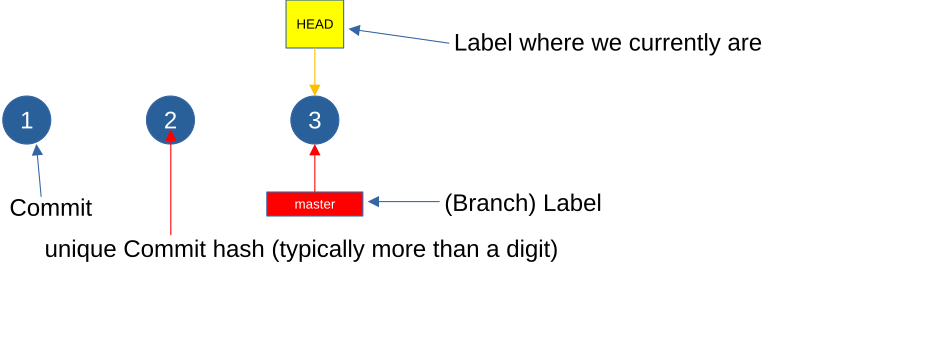
</div>

To connect these commits, we should draw some arrows.
Intuitively we would draw them in the direction of time like this:
<div>
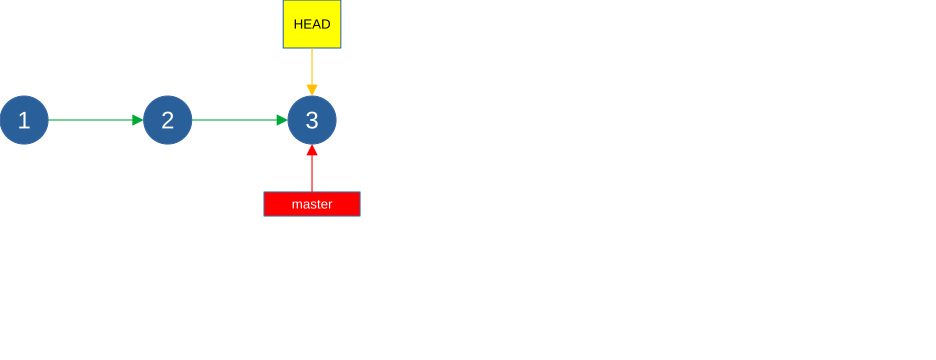
</div>

But we should draw them in the other direction such that every commit is linked to it's predecessor.
With git we want to get access to the history of our project, for that it is essential that we know the predecessors of our commits and not the successors (we don't care about the future ;-) ).
A basic rule is now that each commit has exactly one predecessor even though it can have arbitrary many successors (many commits can be based on the same commit $\rightarrow$ many branches are based on the same commit).
There are two exceptions: The initial commit does by definition not have a predecessor and there is one special commit called merge commit that has two predecessors (we will look at this later)
<div>
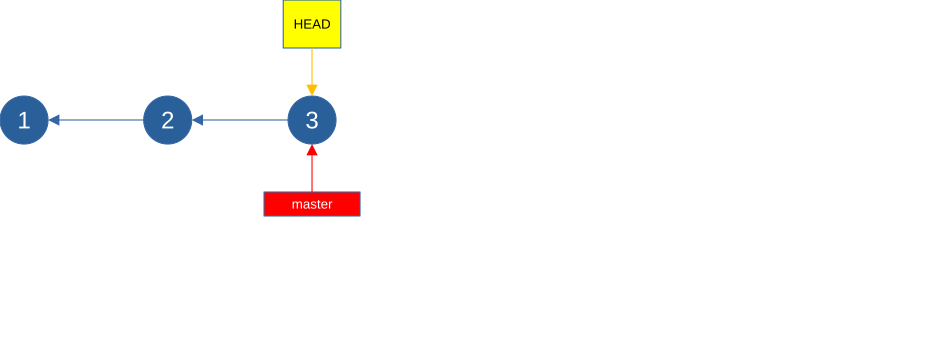
</div>

### Create a Commit

Change things in your repository and use `git commit`.
It creates a new commit with the commit with the previous commit as its predecessor.
It then sets the end of the active branch to the new commit and also moves the HEAD to the new commit.
<div>
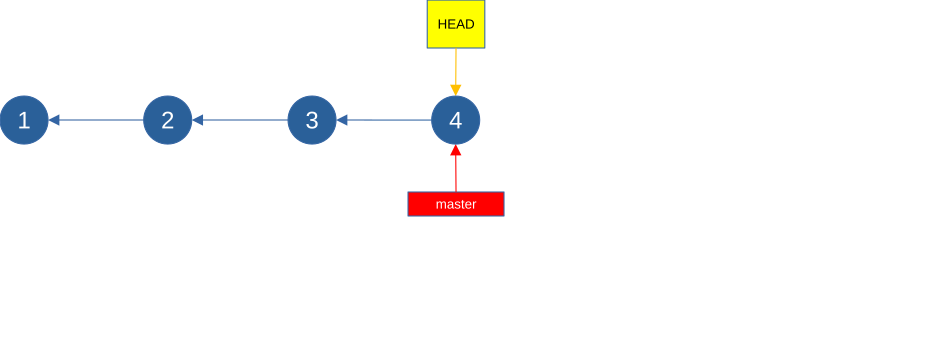
</div>

### Working on a branch

Create a new branch using `git branch <branch name>`.
This creates a new branch that points to the commit where we currently are. (In the figure we were at commit `4` on the `main` branch and the new branch is called `feature1`)
<div>
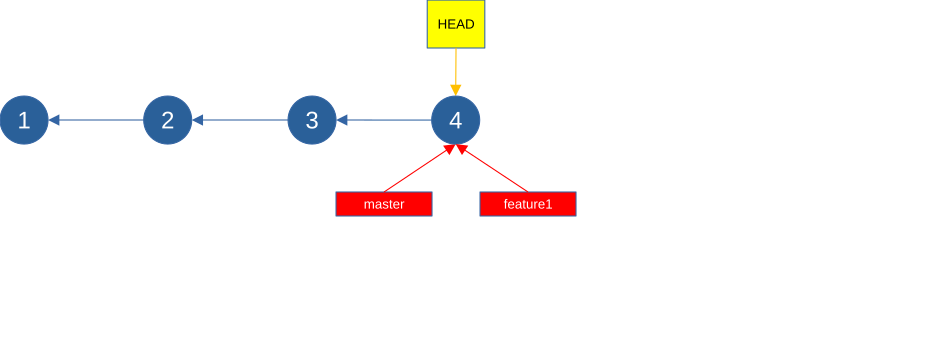
</div>

Although we created a new branch, the active branch is still the one that we had before (and from which we created the new one).

Use `git checkout <branch name>` to switch to the newly created branch.
Creating a commit now, creates the commit on the active branch (which is the `feature1` branch in our visualisation).
The end of the `master` branch stays where it was before.
<div>
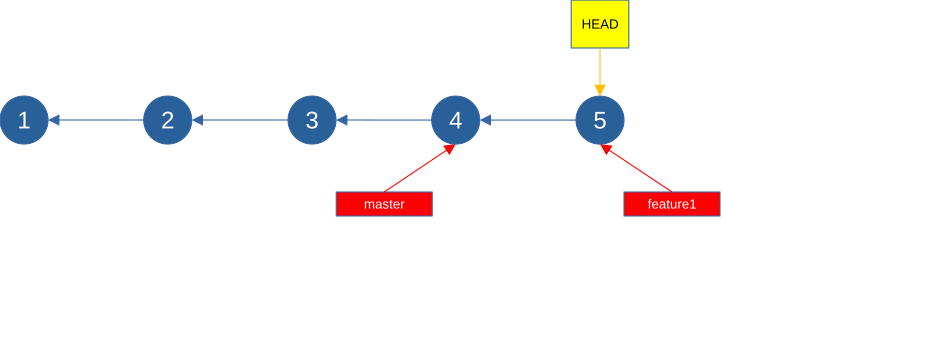
</div>

### Merge (fast forward)

To merge one branch into another branch, the branch into which we want to merge something (the branch we want to update) has to be the active branch. (Not to be confused with the branch that we want to merge *from*)

Use `git checkout <branch name>` to switch to the other branch.
<div>
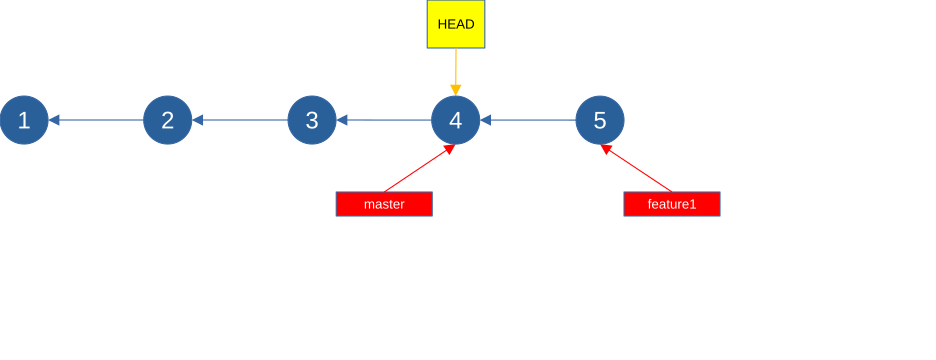
</div>

In our case we want to merge the branch `feature1` into the currently active `master` branch.
This can be done by executing `git merge <branch name>` which is `git merge feature1` in our case.
Git now recognizes that the branch we want to merge is based on the (last commit of the) active branch.
In that case a so called fast forward merge can be performed.
That means that the active branch (`master` in our case) is just updated to the branch we want to merge (`feature1`).
In other words: the end of the active branch is just moved to the end of the branch we want to merge.
<div>
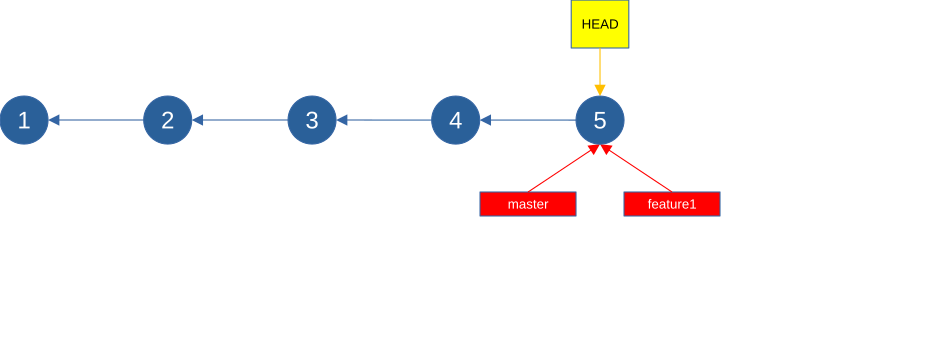
</div>

### Working on multiple branches "simultaneously"

Imagine we develop a feature on the branch `feature1` based on the `master` branch.
While we still have to test this feature we checkout `master` again.
<div>
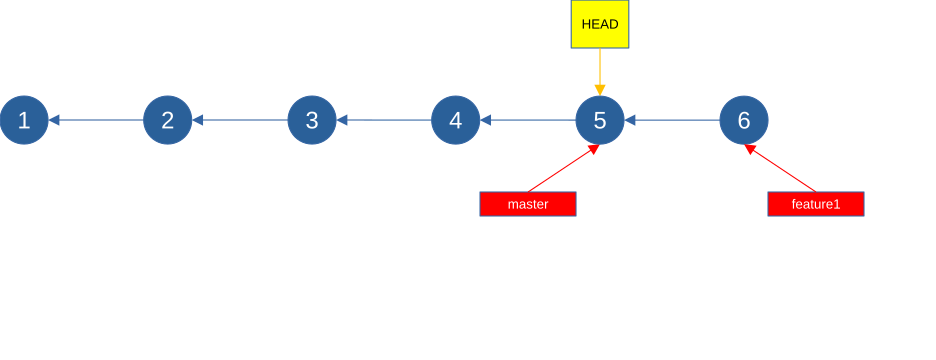
</div>

Now we create another branch based on `master` called `feature2`.
<div>
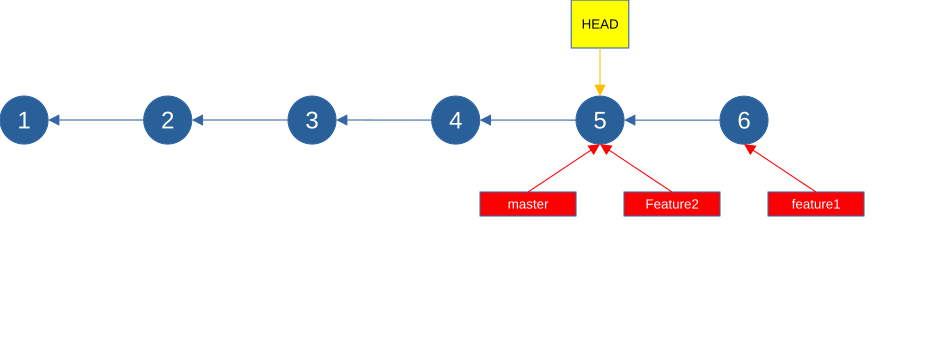
</div>

We start developing a second feature.
<div>
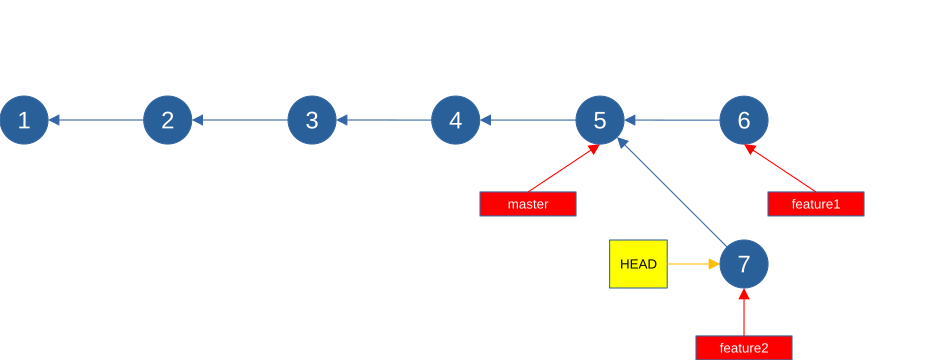
</div>

We can switch forth and back between the different branches and work on them independently and kind of "at the same time".
Now we finish the development of the first feature and merge the `feature1` branch to the `master` branch.
Given that `feature1` is based on the `master` branch, it is a fast forward merge again.
<div>
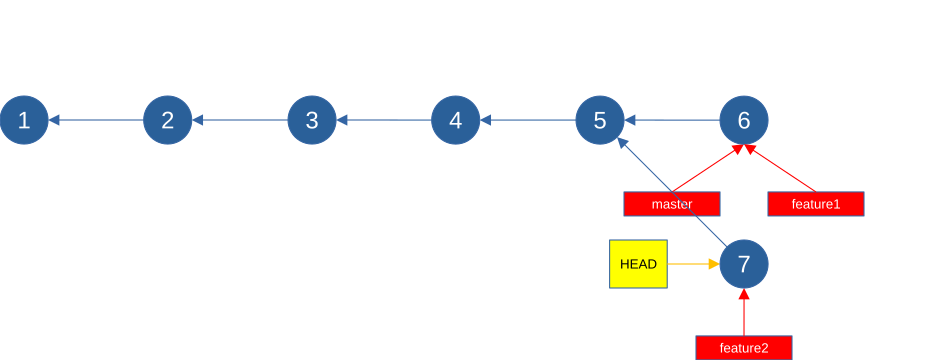
</div>

### Merge (merge commit)

Now we also finish the development and testing of the second feature and we would like to merge `feature2` into `master`.
The problem is, due to the update of `master` (merge of `feature1`) the `feature2` branch is not based on the `master` anymore.
That means a fast forward merge is not possible this time.
If we would just set the `master` branch to the `feature2` branch, we would lose the feature developed on `feature1`.
To avoid this, we need a so called merge commit.
We just use `git merge feature2` as we did before for the fast forward merge and git recognises that a fast forward merge is not possible and automatically creates a merge commit.
<div>
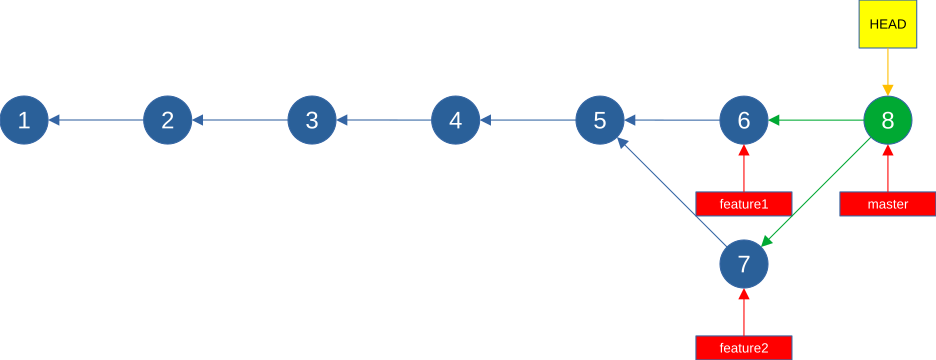
</div>

The merge commit is a special commit, because it has two predecessors.
It takes all the changes that were made on the `feature2` branch and applies them on the `master` branch.

### Time travelling

We also promised that we can recover old versions of our project using git.
One option we have is using `git checkout <branch name>` to go back to an outdated branch (e.g. `feature1`).
This obviously restricts our travel destinations to commit that are at the end of a branch.
But we can also reach every commit in our history.
We can look at our history and just count how many commits we want to go back and use `git checkout HEAD~ <number of commits>`.
The other option is that we look at the history and note the commit hash of our destination and use `git checkout <commit hash>`.
<div>
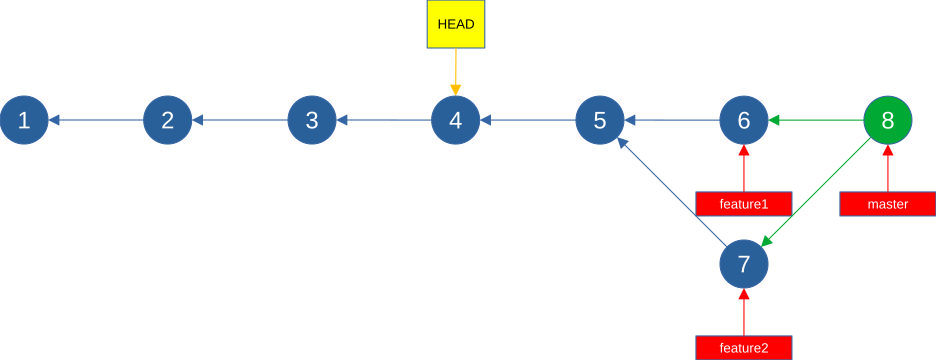
</div>

We are now in a `detached HEAD` mode.
Our `HEAD` is currently not assigned to any branch (we don't have an active branch at the moment).
The options we could do here are limited for example we can't create any commit, because it wouldn't be assigned to any branch.
But we can create a branch here if we want to develop something based on this old commit.

A very important question we should answer now is: How to go back to the most recent state?
Looking at the history doesn't make any sense, because we can only look into the past, not to the future.
But the branches still work and we can use in our case `git checkout master` to go back to the most recent commit.

In the interactive part we will put what we learned into action and step-by-step create and work with our own git repository.

**Do not panic!** All of this might seem a bit much and abstract. In the rest of this notebook we will go through the different things step-by-step. We will first discuss the 5 things you will need most often: creating repositories, **cloning**, **committing**, **pulling** and **pushing**. Then we will discuss some more advanced topics that will be useful if you work with larger projects or multiple people. Seeing these concepts in action will hopefully help you to understand them better. It is also totally expected that you will not be able to remember all of it. But if you have heard of the different things you can alway search the internet to find out how to do something. Git is so widely used you will find an explanation for whatever you want to do. And you can always come back to this notebook to look things up.

## Recap: Terminals and shells

Git is mostly used using a **shell** within a **terminal** application. There are also graphical user interfaces for various operating systems, but using a terminal is simply more powerful and versatile.  
Please revisit the terminal part of lesson 01.
Go to the notebook and work through the section "Terminals and shells" in the notebook and open a terminal.
Play around with the commands that we explained there, try to use each command at least once.
Also play with these two hints, they are very useful and make working with the terminal much faster.
1. Browse through your bash history: Every command you enter into the terminal is saved (Not actually every command, just the last couple thousands).
   You can make use of that by using the up and down keys on your keyboard.
   Press the up key once to get the last command you used before.
   Press it twice to get the one before that command.
   And press it a third time to get the third to last command and so on.
   After going back in history you can also go forward with the down key.
   This feature makes re-executing of commands very easy and efficient, because you don't need to retype it.
   After selecting one command it also allows you to modify the command.
   This is very helpful if you included a typo or something similar in your command.
   Just select the command from the history and fix the typo instead of retyping the whole command (without the typo).
2. Use autocompletion: Start typing a command and press the Tab key.
   If there is only one option to continue the command, it continues the command as far as possible.
   In case you are not done yet, you have to provide at least one character and then you can try autocompletion again.
   If you don't know the next letter you can also press the tab key twice and it will show you all the options you still have.
   It can autocomplete some commands but also file paths.
   This makes navigating through your file system much faster.
   Another advantage is that you avoid typos in file or directory names, the suggestion is guaranteed to be without typos.

## Creating a repository

Now we will learn how to create a **git repository**.
To do this we will go to a website that hosts git repositories and create a new repository. The most popular host for git repositories is https://github.com/, but there are also others such as https://bitbucket.org/, https://about.gitlab.com/ and many more. To create a repository there you will need to create a free account. 
You can also create your own git host if you control a server. (And it is also possible to create only a **local repository** on your computer. But this slightly defeats the purpose.)

For this tutorial we will use the gitlab-based git host of the physnet:
https://git.physnet.uni-hamburg.de/ Please open this link in a new tab or browser window as you will also still need the JupyterLab. You will be required to log in using your physnet account. 

At the beginning you will have no repositories, so let's create one. For this we will use the blue "New Project" button:
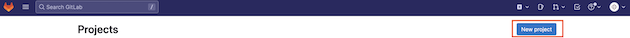

In the next screen we are asked what kind of project we want to create. For this tutorial we will choose **Create blank project**. 

Then in the next screen we can choose a name for our repository and also customize a few other options. Please choose a suitable name and also choose "Internal" or "Private" as visibility level. Leave the other options as they are and then press **Create project**. 

We are now redirected to the main page of our repository. If there are warnings about some "ssh" thing and some "Auto DevOps" thing, dismiss them by clicking on the "X" in the corner.


The main page of the repository will probably look like this:

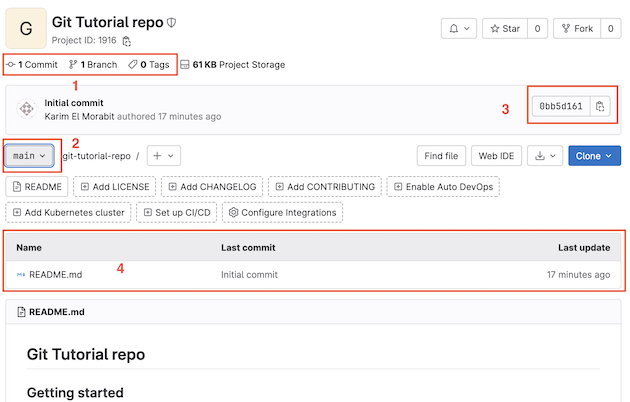

In the "<font color='red'>area 1</font>" we can see that our repository has 1 branch, 1 commit and 0 tags. As we can see directly below the red "<font color='red'>area 1</font>", this one commit is the initial commit that was automatically created. In the "<font color='red'>area 3</font>" we can see the commit hash of this commit. If we click on the button in "<font color='red'>area 2</font>" we can see the branches our repository has. At the moment there is only the main branch. And in "<font color='red'>area 4</font>" we can see the files and directories that exist in this main branch. Currently there is only one automatically generated file called "README.md". If gitlab finds a file with this name, it will display its content on the main page of the repository. We can also click on the listed files to open them.

**Note**: We can also create a local repository from an existing directory on our computer. Then we can create an empty remote repository and connect the two. But we will not explain this in this notebook. But since we now know that this is possible we can search the internet if we ever need to do this.

## End of part 1

This is the end of the part you should read at home. Everything below this cell will be topic in the next exercise session and you don't need to look at this now.

## Interactive Part

## Cloning

Now that we have a repository we want to **clone** it to our local computer. We will go to our home directory and clone the repository into there. We will go through the different steps to do this. After the list of the steps you can also see an example for how this looks in the terminal if you are unsure about what to do.

1) Open a terminal if you did not already have one.  
2) Change the language to english by typing in `export LANG=en_US.UTF-8` and hitting the enter key (From now on we will not state to hit the enter key. Whenever you are instructed to use a command it should be understood that you execute the command by pressing the enter key.)  
3) Go to your home directory by using the `cd` command (You can verify that you are in your home directory by using the `pwd` command).  
4) Use `cd` to navigate to a place that you find useful for your repository. You can also create a directory with `mkdir`   
5) Go to the main page of your repository. You should have already opened it in another tab of the web browser.  
6) Press the blue "<font color='blue'>Code</font>" button.  
7) This will open a dropdown menu. Copy the url below "Clone with HTTPS". It should look something like this `https://git.physnet.uni-hamburg.de/USERNAME/REPOSITORYNAME.git`  
8) Go back to your terminal  
9) Type in `git clone` followed by a space and then by the url. So for example `git clone https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo.git` Then press the enter key  
10) You will be asked for your physnet username and password. Enter them and confirm with the enter key. 
It is normal that no characters appear while typing the password.  

If done correctly the repository will now be **cloned** to our local computer: It will create a **local repository** that is a copy of our **remote repository**.

11) Enter the directory of the repository with the command `cd repository_name`. With our example repository we would do `cd git-tutorial-repo`. (Note: If your repository name contains spaces ` `, git will replace them by `-` for this purpose. You can see the which name to type if you check the last part of the url. You could also use the `ls` command to see how the repository directory is called.)

The whole thing should look like this:
```
$ bash
groups: cannot find name for group ID 20212
groups: cannot find name for group ID 1095774235
USERNAME@idefix070:~$ export LANG=en_US.UTF-8
USERNAME@idefix070:~$ cd 
USERNAME@idefix070:~$ pwd
/afs/physnet.uni-hamburg.de/users/ex_ba/USERNAME
USERNAME@idefix070:~$ git clone https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo.git
Cloning into 'git-tutorial-repo'...
Username for 'https://git.physnet.uni-hamburg.de': USERNAME
Password for 'https://USERNAME@git.physnet.uni-hamburg.de':
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
USERNAME@idefix070:~$ cd git-tutorial-repo/
```

## Taking a look around

We will now take a look around to see what is inside the directory of the repository. Please do:

1) Look around in the directory with the `ls` command

```
USERNAME@idefix070:~/git-tutorial-repo$ ls 
README.md
```
We can see that the directory contains the `README.md` file we already saw on the web page. We can also check which **branches** exist. To do this:

2) Use the command `git branch -avv` 

The addition `-avv` will tell the command that we want to see all information about the local and remote branches. You could also use the command without this addition, but then it would only show the names of the local branches. When you use it, make sure that the `-` is the first character of the argument. Otherwise it will create a branch (for example with the name "a-vv" if you swapped the - and the a). More about creating branches later. If you accidentally created a branch, do not worry. Just try again.

The output should look like this:
```
USERNAME@idefix070:~/git-tutorial-repo$ git branch -avv
* main                0bb5d16 [origin/main] Initial commit
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 0bb5d16 Initial commit
```

There are 3 different branches. We will go through them in the reverse order

- The third branch is called `remotes/origin/main` It is a **local copy** of the `main` branch in the **remote repository**. The `origin` means that it is connected to the **remote repository** where this **local repository** was cloned from. (In principle one can connect multiple remote repositories to one local repository.) We can also see that on this **branch** the last **commit** that the **local repository** knows of has the hash `0bb5d16` and the comment `Initial commit`.
-  The second branch is called `remotes/origin/HEAD` and is a special branch. It points to the **active branch** of the remote repository. We can see that it points to `origin/main`.
-  The first branch is called `main` and is a **local branch**. The `*` indicates that this is the **active branch** that is currently **checked out**. This means that the files in our **working directory** are currently in the state of the last commit on this branch. The last commit on this branch has the hash `0bb5d16` and the comment `Initial commit` (the same as for the third branch). We can also see `[origin/main]` which means that this **local branch** is connected to the **remote branch** `origin/main`. We also say that the **local branch** **tracks** the **remote branch**.

This is probably rather confusing right now. But it will become clearer once we work more with the repository.

We can also check which **remote repository** is connected to our **local repository** by using the `git remote -v` command:

3) Use the `git remote -v` command

```
USERNAME@idefix071:~/git-tutorial-repo$ git remote -v
origin  https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo.git (fetch)
origin  https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo.git (push)
```
Our **local repository** knows one **remote repository** called `origin`. We can also see the corresponding url. There are two different lines for pulling and pushing because we could configure different repositories for these purposes. But this is almost never necessary.

Note: This command might seem unnecessary. After all, we just cloned the repository and therefore know the url. But if we ever forget it we can look it up this way.

The last thing we will do for now is look at the status of the working directory by using `git status`

4) Do `git status`

```
USERNAME@idefix070:~/git-tutorial-repo$ git status
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
```

We can again see on which branch we are and how it compares to the local copy of its **tracking** (connected) branch `origin/main`.
At the moment there is nothing to commit, which means that the files in our working directory have not been changed.
But we will change this in the next step.

## Commiting

We will now create a file with some content and commit it. For this we will use the terminal based text editor "nano".
1) Do `nano myfile.txt` -> This will open a file called `myfile.txt` with the nano editor.  
2) Type a short phrase such as `elephants are cool`  
3) When your are done, save the file by pressing **ctrl+o** and hitting enter. Then exit the editor with **ctrl+x**. On german keyboards **ctrl** is **strg**. And on mac the key is called **control**.  
4) Verify the content of your file with the command `cat myfile.txt`. This prints the content of the file to the terminal.  

Now that we changed something, lets check `git status` again.

5) Do `git status`

```
USERNAME@idefix071:~/git-tutorial-repo$ git status
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        myfile.txt

nothing added to commit but untracked files present (use "git add" to track)
```

Git has noticed that there is a new file. 

**Note** If there is a file called "core" please just ignore it. 

To commit the file we first need to add it to the **staging area**. For this we use the `git add` command and then check the status again:

6) `git add myfile.txt` -> Adds the file to staging area  
7) Do `git status`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git status
On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   myfile.txt
```

We see that the file now has a different color and is listed under "Changes to be committed". We can add as many changed and new files to the staging area as we like. But only files in the staging area can be committed. If we are done adding files we **commit** the changes in the staging area with `git commit -m "some explanation"` where "some explanation" should be a short comment describing what was changed.

8) Do `git commit -m "some explanation"` -> commits the changes in the staging area. You should replace "some explanation" with something short that actually explains things. For example "added test file".

```
USERNAME@idefix071:~/git-tutorial-repo$ git commit -m "added file about elephants"
[main 5b651a3] added file about elephants
 Committer: John Doe <USERNAME@idefix071.physnet.uni-hamburg.de>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1 insertion(+)
 create mode 100644 myfile.txt
```

The first part about the email is normal and can be ignored. We could get rid of it by properly setting up our account as explained in the text. But we will just ignore it here. At the bottom we can see that we changed 1 file and added some text (insertion).

We can have a look at the log so see which commits are present. We see that the new commit is included in the *main* branch, but not yet in *origin/main*

```
USERNAME@idefix071:~/git-tutorial-repo$ git log
# easier to read the graph:
USERNAME@idefix071:~/git-tutorial-repo$ git log --oneline --graph --decorate
```

## Pushing and pulling

After committing we want to **push** our changes to the **remote repository**. But first we will **pull** in case there were changes in the **remote repository** since we last updated the **local repository**. (In our case there should not be any changes. But it is a good habit to do this). We do this with the `git pull` command and we again need to enter our username and password.

1) Do `git pull` and enter your username and password

```
USERNAME@idefix071:~/git-tutorial-repo$ git pull
Username for 'https://git.physnet.uni-hamburg.de': USERNAME
Password for 'https://Username@git.physnet.uni-hamburg.de':
Already up to date.
```
This will **fetch** any changes (there should not be any at the moment) from the **remote repository** and update the **local copies** of the **remote branches**. If our **active branch** is **tracking** a **remote branch** it will also **merge** the changes into our **active branch**.

Now we will **push** using the `git push` command:

2) Do `git push` and enter your username and password

```
Username@idefix071:~/git-tutorial-repo$ git push
Username for 'https://git.physnet.uni-hamburg.de': Username
Password for 'https://Username@git.physnet.uni-hamburg.de': 
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 40 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 333 bytes | 333.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://git.physnet.uni-hamburg.de/Username/git-tutorial-repo.git
   0bb5d16..5b651a3  main -> main
```

We can check what happened by looking at the web page of the repository. If everything worked as it should, the new file should now be listed on the web page together with the commit comment we wrote.

**Note**: We do not have to push after each commit. We can do as many commits as we like before pushing.

**Note** What we learned up until now should be enough to work with small projects where only we contribute to.
But it is useful to also know a couple of more advanced things in case we want to work with larger projects or multiple people.

## Advanced Topic: Creating and merging branches

We often want to create additional **branches**. A common use case we already mentioned above is that we want to create "development branches" with which we can develop code without fear of breaking the **main branch**. There are multiple ways to create branches and we will look at two of the most common of them.

### Local branches

We can create an **untracked** **local branch** by using the `git branch new_branch_name` command. This will create a new branch from the most recent commit of the currently **active branch**. It is **untracked** which means that there is no connected branch in the **remote repository**. We could also add a commit hash as additional argument to create a branch starting from there instead. 

Let's create such a local branch:

1) Do `git branch development`  
2) Check what branches we have now with `git branch -avv`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git branch development
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
  development         5b651a3 added file about elephants
* main                5b651a3 [origin/main] added file about elephants
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 5b651a3 added file about elephants
```
We see that we now have an additional branch called `development` that has the same last commit as the `main` branch. 
To actually work with the branch we need to do `git checkout branchname` which will set the branch with the name `branchname` as the **active branch** and  the files in the current directory to those of the **active branch**.

3) Do `git checkout development`  
4) Do `git branch -avv` to see what happened  

```
USERNAME@idefix071:~/git-tutorial-repo$ git checkout development
Switched to branch 'development'
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
* development         5b651a3 added file about elephants
  main                5b651a3 [origin/main] added file about elephants
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 5b651a3 added file about elephants
```
We see that the active branch now is the `development` branch.

We can "develop" a bit by changing the file `myfile.txt`.

**Note:** Sometimes git opens a text editor e.g. when you just type `git commit` without adding a commit message.
In that case git opens a text editor and asks you to enter a commit message.
On some systems the default editor for this is vim, which is less beginner friendly than nano, which is the default on this system.
To also show you vim once we open the file with the `vi` editor, change the file and then save it again:

5) `vi myfile.txt` -> Open the file with vim  
6) Press `i` to enter the insert mode to be able to change the file  
7) Change the file. You could for example add a new line with some additional text  
8) press `Esc` to leave the insert mode  
9) Save the file with **:w** then **enter**  
10) Close the editor with **:q** then **enter**  

We then add the changed file to the staging area and commit the changes:

11) `git add myfile.txt`  
10) `git commit` This time we leave out the commit message to demonstrate that git will open an editor (nano in our case)  
11) Enter the commit message  
12) Save the file with **ctrl o** then **enter**  
13) Close the editor with **ctrl x**  

```
USERNAME@idefix071:~/git-tutorial-repo$ nano myfile.txt 
USERNAME@idefix071:~/git-tutorial-repo$ git add myfile.txt 
USERNAME@idefix071:~/git-tutorial-repo$ git commit
[development 78b55ce] added parrots
 Committer: John Doe <USERNAME@idefix071.physnet.uni-hamburg.de>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1 insertion(+)
```

If we now check `git branch -avv` we should see that the last commit on the `development` branch is our new commit while the `main` branch is still at the previous one.

14) `git branch -avv`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
* development         78b55ce added parrots
  main                5b651a3 [origin/main] added file about elephants
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 5b651a3 added file about elephants
```

Now that we have developed our new feature, we want to **merge** the `development` branch back into the `main` branch. To do this we first **checkout** the main branch and then use the `git merge branchname` command to merge the branch `branchname` into the currently active branch (which then will be the `main`branch).

15) **Checkout** the `main` branch with `git checkout main`  
16) **Merge** the `development` branch into the **active branch** with `git merge development`  
17) Check what happened with `git branch -avv`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git checkout main
Switched to branch 'main'
Your branch is up to date with 'origin/main'.
USERNAME@idefix071:~/git-tutorial-repo$ git merge development
Updating 5b651a3..78b55ce
Fast-forward
 myfile.txt | 1 +
 1 file changed, 1 insertion(+)
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
  development         78b55ce added parrots
* main                78b55ce [origin/main: ahead 1] added parrots
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 5b651a3 added file about elephants
```  

We can see that the `main` branch has now the same last commit as our `development` branch.

**Note:** If some other changes are made to the `main` branch after we forked of the `development` branch we need an additional step:
- First we merge the `main` branch in the `development` branch
- Then we merge the `development` branch back into the `main` branch

Lets also push the new changes to the remote repository 

18) Do `git pull`  
19) Do `git push`  

By now you should understand the output of the two commands. If something went wrong or seems weird, ask the tutor.

### Remote branches

The branch we just created was an **untracked** **local branch**. This is useful if we work alone on a feature and do not need a backup online. If we want to backup our ongoing development online or multiple people work on the same development branch it is more useful to create an additional branch that also exists in the **remote repository**.
We can use `git push -u origin <branch name>` to push a local and untracked branch to the remote repository, the option `-u` or `--set-upstream` makes it also track the freshly created branch in the remote repository.
Let's demonstrate this with our `development` branch:
1) Check out the `development` branch with `git checkout development`  
2) Check what `git branch -avv` shows you  
3) Push the development branch to the remote repository and set the upstream branch with `git push -u origin development`  
4) Check `git branch -avv` again  

```
USERNAME@idefix073:~/git-tutorial-repo$ git checkout development 
Zu Branch 'development' gewechselt
USERNAME@idefix073:~/git-tutorial-repo$ git branch -avv
* development         6be7906 added birds
  main                6be7906 [origin/main] added birds
  remotes/origin/HEAD -> origin/main
  remotes/origin/main 6be7906 added birds
USERNAME@idefix073:~/git-tutorial-repo$ git push -u origin development 
Username for 'https://git.physnet.uni-hamburg.de': Username
Password for 'https://Username@git.physnet.uni-hamburg.de': 
Gesamt 0 (Delta 0), Wiederverwendet 0 (Delta 0)
remote: 
remote: To create a merge request for development, visit:
remote:   https://git.physnet.uni-hamburg.de/Username/git-tutorial-repo/-/merge_requests/new?merge_request%5Bsource_branch%5D=development
remote: 
To https://git.physnet.uni-hamburg.de/Username/git-tutorial-repo.git
 * [new branch]      development -> development
Branch 'development' folgt nun Remote-Branch 'development' von 'origin'.
USERNAME@idefix073:~/git-tutorial-repo$ git branch -avv
* development                6be7906 [origin/development] added birds
  main                       6be7906 [origin/main] added birds
  remotes/origin/HEAD        -> origin/main
  remotes/origin/development 6be7906 added birds
  remotes/origin/main        6be7906 added birds
```

Another way to create a branch that also exists in the **remote repository** and whose **local branches** are also **tracked** is to use the webpage.

5) Go to the webpage  

Next to where we can choose the current branch is a "+" button.

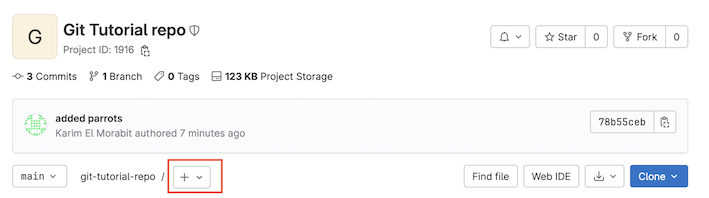

6) Press this "+" button and choose "New branch".  
7) You will be sent to a page where you can choose a name for the new branch and also a starting point.  
8) Choose a suitable name (maybe "feature". To avoid confusion we should not choose the same name as the local branch we created earlier (development)).  
9) Also choose "main" as the starting point.  
10) Then press "Create branch".  

We are then sent to a page showing us the new branch. And if we press the button on the left we can also see which branches exist: 

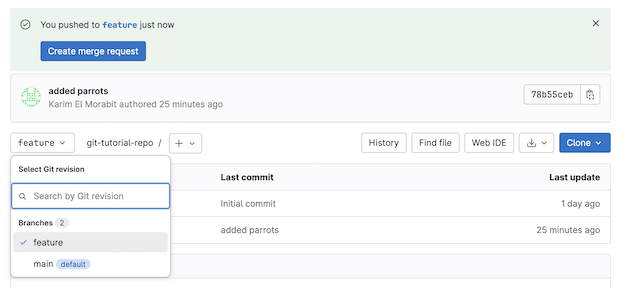

We can also merge branches using the web page. But for this we first need to make a commit. And we can also do this on the web page (This is best used when we want to do small quick changes to a single file)!

11) Click on the file "myfile.txt". This will open the file in your browser.  
12) Press "Open in Web IDE". This should open a new tab with the file in a text editor which looks very similar to Visual Studio Code.  
13) Edit the file a bit  

<div>
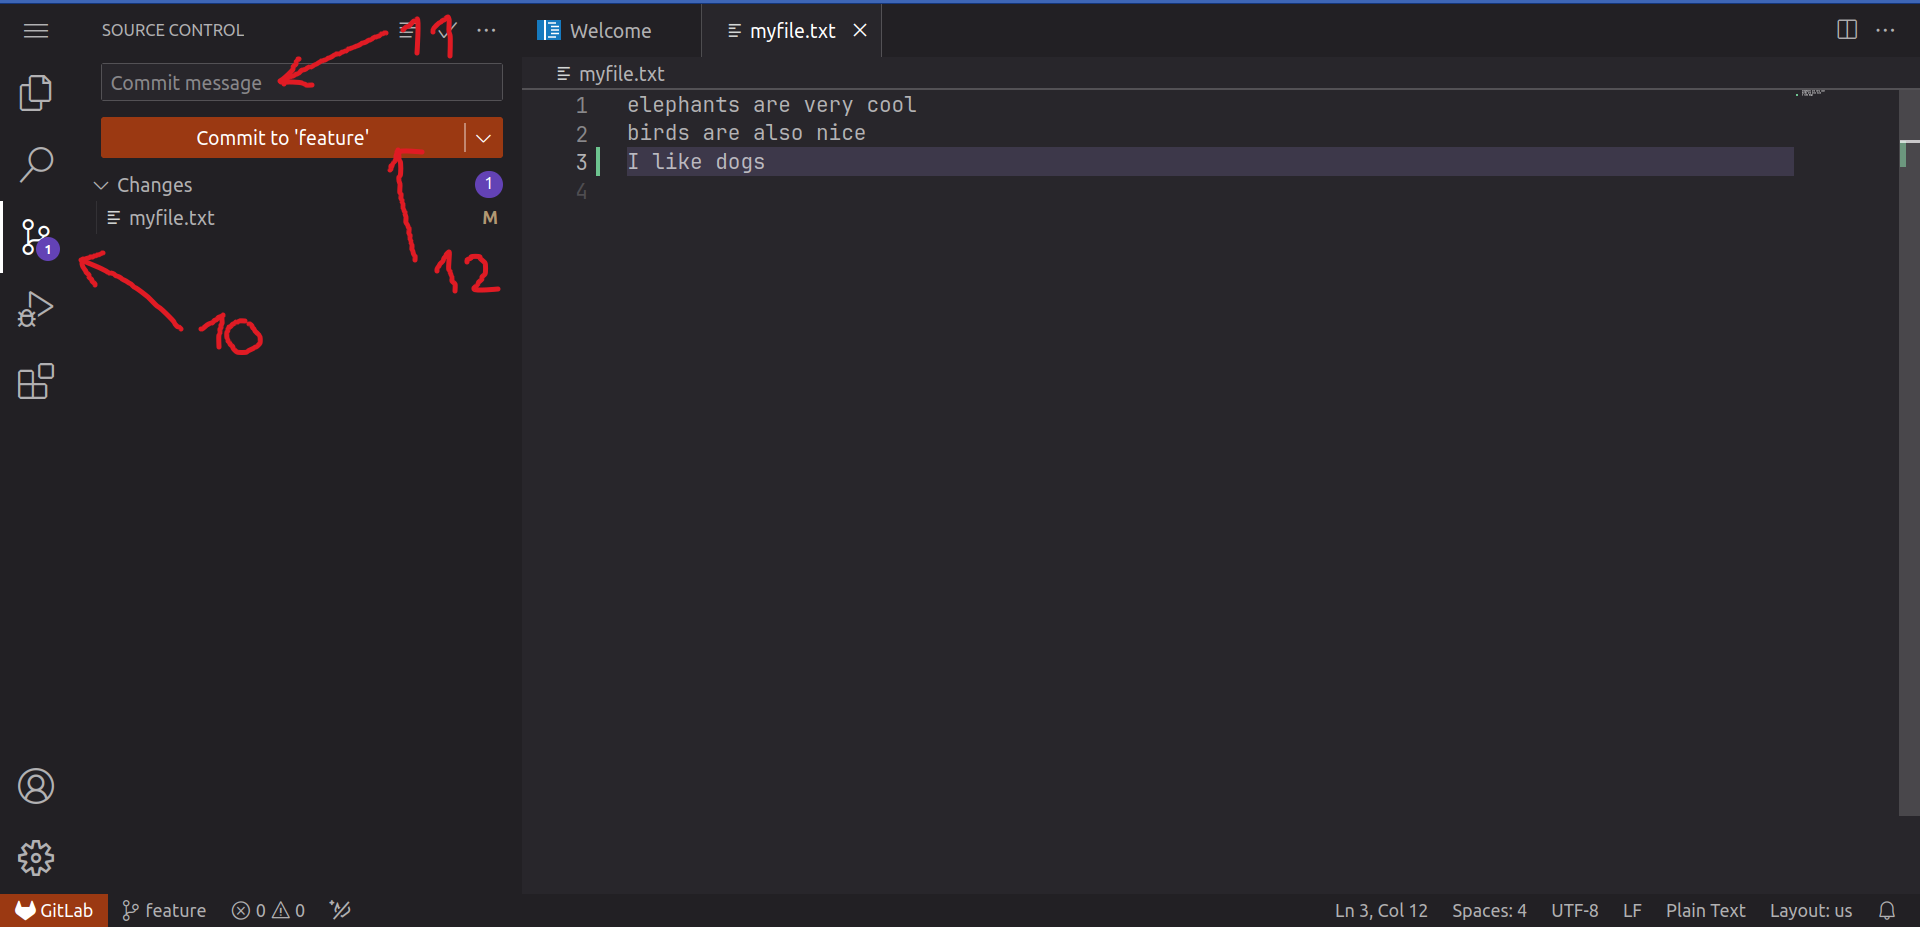
</div>

14) Press the "Source Control" button in the left sidebar which has a version control symbol and is already marked with a 1 because you changed something  
15) Enter a commit message.   
16) Click on the red button "commit to `branchname` branch" (in the example case the branchname is "feature").  
17) Ignore the popup that offers you to create a merge request. We will manually start a new merge request in a moment.  
18) Close the tab with the editor  
19) Go back to the main page of the repository and select the feature branch in the drop down menu. You will see that your new commit was the most recent commit.  

Now we want to **merge** the `feature` branch into the `main` branch using the web interface. For this we need to "open" a **merge request** (also called **pull request** and abbreviated **PR**).
The procedure is very complicated compared to a simple `git merge` in the terminal.
The reason is that a merge request is what you have to do to merge branches from your fork back into the original repository.
Another usecase for merge requests is a protected `main` branch.
In many repositories the `main` branch is protected such that not every developer can push to that branch.
In that case (it is in general good practice also if you are allowed to push on the `main` branch) you work on a feature branch and then you create a merge request such that other people can have a look at the feature and test it before it goes into the stable version of the project.
In our case a merge request is a bit overkill and useless if you are the person who will accept it.
But it is good to know how to create merge requests.

**Note**: Gitlab has noticed that we made the changes and has probably put some green areas on the top of the page to also open a merge request. Please ignore this for now. We will do it a bit more manually to learn more.

20) In the left sidebar is an item called "Merge requests". Click on it.  
21) On the bottom click on "New merge request"  
22) In the next screen you can choose a source branch and a target branch. Choose your new branch as source and the "main" branch as target.   

**Note** We could also choose a source and target project. This can be used to merge branches between **forks** which is the term for remote copies of repositories owned by different people.

23) Press "Compare branches and continue".  

Gitlab will now check whether the branches can actually be merged. Sometimes the differences are so large that git does not know what to do. This happens most often when both branches have had a lot of commits since they were forked. If everything is ok we will be sent to a new screen titled "New merge request". Here we can choose a couple of things (we will not go through all of them here):
- A title: a brief description what this merge is about
- A Description: In larger projects merge requests often need to be approved by a reviewer. The description should explain the reason for the merge request
- An assignee: The person responsible for the merge. Most often the developer who requested the pull request. So you.
- A reviewer: A person that should check the PR and approve the merge
- "Delete source branch when merge request is accepted.": To avoid cluttering the project with thousands of small branches it is often a good idea to delete a feature/development branch after it is merged back into another branch. But for now we want to keep the branch to do other things later on. 

24) Choose a title and description. **Also deselect "Delete source branch when merge request is accepted." We want to keep the branch for now!**  
25) If you are content with your choices press "Create merge request"  

We are then sent to page about our merge request. You can also see all merge requests of the repository if you click on "Merge requests" in the left sidebar.
To approve a merge request and to actually do the **merge**:

26) Open the link **merge requests** on the left sidebar and then choose our new **merge request**  

Here we can see its title and description. By clicking around a bit we can also see which commits are included and which changes were made to which files. There is also a comment field where the reviewer can write a comment to request changes or other things. There is also an approval button where the reviewer can approve the merge. To actually do the **merge** the person with the power to do so (here you) can use the "Merge" button at the bottom. 

27) First **deselect "Delete source branch when merge request is accepted." We want to keep the branch for now!**.   
28) Then press the "Merge" button.  

After a couple of seconds the merge is done. 

29) Please go back to the main page of the repository.  

**Note**: We are currently using a gitlab server hosted on physnet. If you are using another git host such as github the page and menus will look different. But there should be the same functionality. It might just take a bit of time to get used to (and things might be called a bit different such as **merge request** vs **pull request**).



### The branch graph

A cool feature that is available on most git hosting sites is a graph showing the different branches and how they are connected. In gitlab we can find the graph under "Code/Repository Graph" in the left sidebar. In our example repository it looks like this.

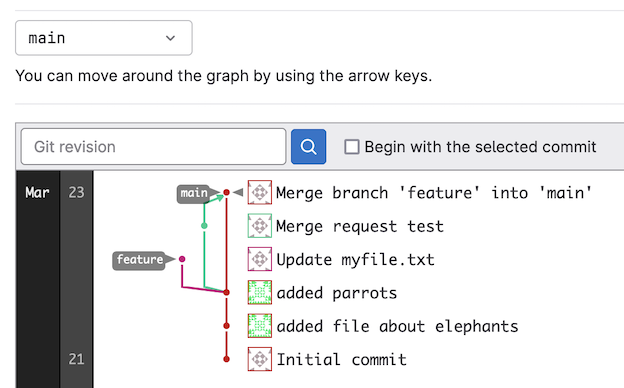

Each dot is a commit and we can check what the commit did by clicking on it. The lines represent the different branches and we can see where branches were split from other branches and where they were merged again

## Advanced topic: Using the new branch in the local repository

We have created a new branch in the **remote repository**. To also get this new branch into the local repository we can use the **fetch** command:

1) Go back to the terminal  
2) Do `git fetch` (Enter username and password)  
3) Check `git branch -avv`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git fetch
Username for 'https://git.physnet.uni-hamburg.de': USERNAME
Password for 'https://USERNAME@git.physnet.uni-hamburg.de': 
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo
   78b55ce..9661604  main       -> origin/main
 * [new branch]      feature    -> origin/feature
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
  development                6be7906 [origin/development] added birds
* main                       6be7906 [origin/main: behind 2] added birds
  remotes/origin/HEAD        -> origin/main
  remotes/origin/development 6be7906 added birds
  remotes/origin/feature     3bd6f76 Update file myfile.txt
  remotes/origin/main        6f5a7dc Merge branch 'feature' into 'main'
```

If nothing went wrong the **local repository** should now also have a copy of the new `feature` branch. (Here "remotes/origin/feature")
We can also see that the current active branch `main` is two commits behind the remote `main` branch. To get our current branch up-to-date we could merge the `origin/main` into the `main` branch or simply do a **pull**. (The **pull** also does the **fetch**. So we could have actually skipped the previous step.)

4) Do `git pull` to get your main branch up-to-date  

We now want to set the **active branch** to the branch we created on the web page. We do this with `git checkout branchname`. This will create a **local branch** with the name `branchname` and set it as the **active branch**. Git will also check whether there is a remote branch that fits the name. If it finds one it will set the new **local branch** to **track** the **remote branch**.

5) Use `git checkout branchname` to do this (In our example `git checkout feature`). Git will then find the remote branch `origin/feature` and set it as tracking branch)  
6) Check what happened with `git branch -avv`  

```
USERNAME@idefix071:~/git-tutorial-repo$ git checkout feature
Branch 'feature' set up to track remote branch 'feature' from 'origin'.
Switched to a new branch 'feature'
USERNAME@idefix071:~/git-tutorial-repo$ git branch -avv
  development                6be7906 [origin/development] added birds
* feature                    3bd6f76 [origin/feature] Update file myfile.txt
  main                       6f5a7dc [origin/main] Merge branch 'feature' into 'main'
  remotes/origin/HEAD        -> origin/main
  remotes/origin/development 6be7906 added birds
  remotes/origin/feature     3bd6f76 Update file myfile.txt
  remotes/origin/main        6f5a7dc Merge branch 'feature' into 'main'
```

**Note**: We could also choose a different name for the local branch and manually choose which remote branch we should track. For this we can use the command `git checkout -b local_branchname remote_branchname`. In our example we could do `git checkout -b test_feature origin/feature` to create the branch `test_feature` that tracks `origin/feature`.


## Advanced Topic: Merge Conflicts

Most of the time, commits made on different branches that started at the same commit are unambiguous and git can merge the branches without any problems. Consider for example a case where we split a `development` branch from the `main` branch. Then on the main branch we make a change to "file_a.txt" and in the development branch a change in "file_b.txt". To merge the `development` branch into the `main` branch we would first merge `main` into `development`. This would apply the changes in "file_a.txt" to the `development` branch. And then we would merge `development` back into `main` which applies the changes in "file_b.txt" to the `main` branch. 

This also works if the changes are made to the same file as long as there is not ambiguity. An example for this would be if in the `main` branch we change the first word of a file and in the `development` branch we change the last word (or add a new line at the end). In this case git would be able to figure out what to do and be able to merge the without problems.

But if the changes are ambiguous git does not know what to do. Consider the following case:
- In the file `code.py` we have a variable defined as `var = 20`.
- We create a branch `development` from the `main` branch
- In the `main` branch we change the line with the variable definition to `var = 30` 
- In the `development` branch we change the same line to `var = 0`

If we then try to merge the `main` branch into the `development` branch git does not know whether to keep `var = 30` or `var = 0` and will produce a **merge conflict** error message telling us that we need to do something. 

There are certain **merge strategies** we can force git to use when merging, such as to override all changes from one branch with changes from the other branch. But this is often not what we want and can break the code.

If we do not specify any **merge strategy** git will abort the merge and insert both versions of the conflicting lines into the problematic file. The lines will be indicated by being surrounded by `>>>>>>` and `<<<<<<` signs and separated by `========`.
 
To resolve the conflict we have to manually edit the file and then commit the "now correct" file again. Once all **merge conflicts** are resolved in this way, git will finalize the **merge** without further problems.

We can actually produce such a **merge conflict** by hand to see how it looks in reality.
To do this we first commit a change using the web interface :  
1) Go to the web page.  
2) Make sure that the `main` branch is shown. If not switch to the main branch using the dropdown menu.  
3) Click on the file "myfile.txt" and then open it in the Web IDE (If you need more detailed instructions you could go back to where we did that before or ask the tutor)  
4) Change the first word of the file to something different  
5) Commit the changes by pressing the blue "Create commit" button on the bottom left.  
6) Write a commit message and **choose "Commit to main branch"** to directly commit to the main branch without the going though the creation of a feature branch.  
7) Press "Commit" to finalize the commit  
8) Go back to the main page  

Now we will change the same line in the **local repository**

9) Go to the terminal  
10) Switch to the `main` branch with `git checkout main` (Verify this with `git branch -avv`)  
11) Open the file `myfile.txt` in nano with `nano myfile.txt`  
12) Also change the first word of the file here. But this time to something else. *Hint: You can use the arrow keys to navigate in nano*  
13) Save with **ctrl+o** and Enter. Then exit nano with **ctrl+x**  
14) Verify your changes with `cat myfile.txt`  
15) Add the file to the staging area: `git add myfile.txt`  
16) Commit the file with `git commit -m "local change"`  

Now we will produce the conflict by merging the `main` branch in the **remote repository** into the `main` branch of the **local repository** by using `git pull` which will produce a **merge conflict** if everything went "right".

```
USERNAME@idefix071:~/git-tutorial-repo$ git pull
Username for 'https://git.physnet.uni-hamburg.de': USERNAME
Password for 'https://USERNAME@git.physnet.uni-hamburg.de': 
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://git.physnet.uni-hamburg.de/USERNAME/git-tutorial-repo
   9661604..47f6528  main       -> origin/main
Auto-merging myfile.txt
CONFLICT (content): Merge conflict in myfile.txt
Automatic merge failed; fix conflicts and then commit the result
```

Git tells us that there is a `CONFLICT (content)` and also where the merge conflict occurred: `Merge conflict in myfile.txt`. It also tells us what to do to resolve it: `fix conflicts and then commit the result`.

We can also check `git status`:

```
USERNAME@idefix071:~/git-tutorial-repo$ git status
On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)
        both modified:   myfile.txt

no changes added to commit (use "git add" and/or "git commit -a")
```

Where we can get the same information.

To resolve the conflict we do:

17) Open the file with `nano myfile.txt`  

In our example the file now looks like this:

```
<<<<<<< HEAD
dogs are cool
=======
cats are cool
>>>>>>> 47f6528afea8d07984ad140d057ee59811336514
parrots are cool too
and cats
```

We can see that the problematic lines are bracketed by `<<<<<<< HEAD` and `>>>>>>> 47f6528afea8d07984ad140d057ee59811336514` and divided by `=======`.

**Note** : Whenever there is a conflict we need to check the files listed by git for `<<<<<<<` and `>>>>>>>`. Sometimes conflicts can be caused multiple lines in which case it could be hard to see where the two alternatives start and end. It can also happen that there are multiple conflicts in one file. 

To fix the issue we need to decide which version we want to keep. In our case we choose the `dogs are cool` line. We delete the other one and also delete the lines inserted by git. So to resolve the conflict please do:

18) Choose the line you want to keep  
19) Delete the other one  
20) Also delete the lines with `<<<<<<<`, `>>>>>>>` and `=======`.<br/>
21) Save and exit (**ctrl+o**, Enter, **ctrl+x**)<br/>
22) Add the file to the staging area `git add myfile.txt`   
23) Commit the change `git commit` If we do not add a commit message, git will open a nano editor where we could write one. This is optional. You can simply close it with **ctrl+x**.   

Git will then detect that the conflict is resolved and finalize the **merge**.

## Final remark

Git is an incredibly powerful and useful tool and we covered some of the basic things that one can do with it.
For small personal projects it is usually enough to know how to create **remote repository** on a hosting site and to know how to **clone**, **commit**, **pull** and **push**. But there are also many more advanced features such as creating and merging of branches and working with forks. It is also possible to reset your repository to previous commits, which we have not covered at all.

Since git is so widely used there are many excellent resources explaining how to do things such as the following tutorials:
- https://docs.github.com/en/get-started/quickstart/hello-world (tutorial by hosting site github.com)
- https://www.atlassian.com/git/tutorials (tutorial by hosting site bitbucket.com)
- https://docs.gitlab.com/ee/tutorials/ (tutorial by hosting site gitlab.com)
- https://git-scm.com/book/en/v2 (Official tutorial, probably a bit much for beginners)
- https://learngitbranching.js.org/?locale=en_US (a fun interactive page to learn about branches)

There is also the official documentation https://git-scm.com/doc and various "cheat sheets" to remember the commands (example: https://about.gitlab.com/images/press/git-cheat-sheet.pdf ) 

And since it so widely used there is an answer somewhere in the internet for whatever question or problem you might have. (Good answers are often found on https://stackoverflow.com/. So if your favourite search engine proposes sites by stackoverflow it is often a good idea to check them out.)

And finally, if for whatever reason you are totally stuck or have totally destroyed your local repository, it is always possible to create a new clone. (If you have uncommitted changes you could manually copy the changed files from the old to the new clone.)